***
# `Project:` Prevendo a <font color='blue'>morte</font> ou <font color='blue'>vida</font> de pacientes com hepatite

## `Date:` fevereiro, 2022

## `Data Scientist:` Walter Trevisan
***

## `Modelagem Preditiva` (*`Machine Learning`*) - Conclusão

Chegamos ao final da fase de **modelagem preditiva**; agora, vamos analisar os **melhores modelos preditivos** construídos com *6 algoritmos de classificação*. Será escolhido o modelo que atingiu a melhor performance definida para o projeto na métrica **`AUC`**.

### Conteúdo
1. [Setup Inicial](#initial-setup)

2. [Carregar as **métricas dos melhores modelos de classificação**](#metrics-load)

3. [Avaliar e definir o **melhor modelo de classificação** para o projeto](#models-best)

___
<a name='initial-setup'></a>
## <font color='blue'>1- Setup Inicial:</font>

Primeiro, vamos carregar os **pacotes e funções** que serão utilizadas neste **notebook**.

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Importa função para verificarmos a versão da linguagem python:
from platform import python_version

# Importando os pacote NumPy:
import numpy as np
# Importando os pacote Pandas:
import pandas as pd

# Importando pacotes para visualização de gráficos:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Importa o pacote "seaborn" para criarmos gráficos estatísticos:
import seaborn as sns
%matplotlib inline

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Gráficos, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
ROOT_DIR = "."

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
OBJ_PATH = os.path.join(ROOT_DIR, "objects")
# Criando o diretório, se ele não existir:
os.makedirs(OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "objetos" (Data Frames) do Projeto:
DATA_PATH = os.path.join(ROOT_DIR, "data")
# Criando o diretório, se ele não existir:
os.makedirs(DATA_PATH, exist_ok=True)

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) do Projeto:
GRAPHICS_PATH = os.path.join(ROOT_DIR, "images", "graphics")
# Criando o diretório, se ele não existir:
os.makedirs(GRAPHICS_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Modelos Preditivos" (Machine Learning) relacionados ao Projeto:
ML_PATH = os.path.join(ROOT_DIR, "models")
# Criando o diretório, se ele não existir:
os.makedirs(ML_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
LIB_PATH = os.path.join(ROOT_DIR, "library")

# Adicionando o diretório "./library" ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "data_science_library.py":
import data_science_library as dslib

# Importando para este notebook, as classes e funções definidas no módulo "plot_library.py":
import plot_library as ptlib

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
print("Versões dos pacotes usados neste jupyter notebook:")
print("Python      : {}".format(python_version()))
print("Numpy       : {}".format(np.__version__))
print("Pandas      : {}".format(pd.__version__))
print("Matplotlib  : {}".format(mpl.__version__))
print("Seaborn     : {}".format(sns.__version__))

Versões dos pacotes usados neste jupyter notebook:
Python      : 3.8.12
Numpy       : 1.19.5
Pandas      : 1.3.5
Matplotlib  : 3.4.3
Seaborn     : 0.11.2


___
<a name='metrics-load'></a>
## <font color='blue'>2- Carregar as `métricas` dos melhores modelos de classificação</font>

In [3]:
# Carregando as métricas dos melhores modelos de classificação:
models_best_metrics = dslib.pickle_object_load(path=ML_PATH, file="models_best_metrics.pkl")
# Mostrando os primeiros registros:
models_best_metrics.head()

,Model,Data set,AUC,Accuracy,Precision,Recall,F1_score
0,NB,train,0.9179,0.8293,0.9634,0.8144,0.8827
1,NB,test,0.8800,0.7742,1.0000,0.7200,0.8372
2,KNN,train,1.0000,1.0000,1.0000,1.0000,1.0000
3,KNN,test,0.9467,0.9032,0.9231,0.9600,0.9412
4,SVC,train,0.9921,0.9330,0.9038,0.9691,0.9353


___
<a name='metrics-load'></a>
## <font color='blue'>3- Avaliar e definir o `melhor modelo de classificação` para o projeto</font>

### Avaliando a métrica `AUC` nos *datasets* de treino e de teste:

Primeiro, vamos plotar um gráfico de barras para avaliarmos o desempenho de cada modelo em relação aos dados de treino e de teste.

Saving figure: plot_auc_train_vs_test


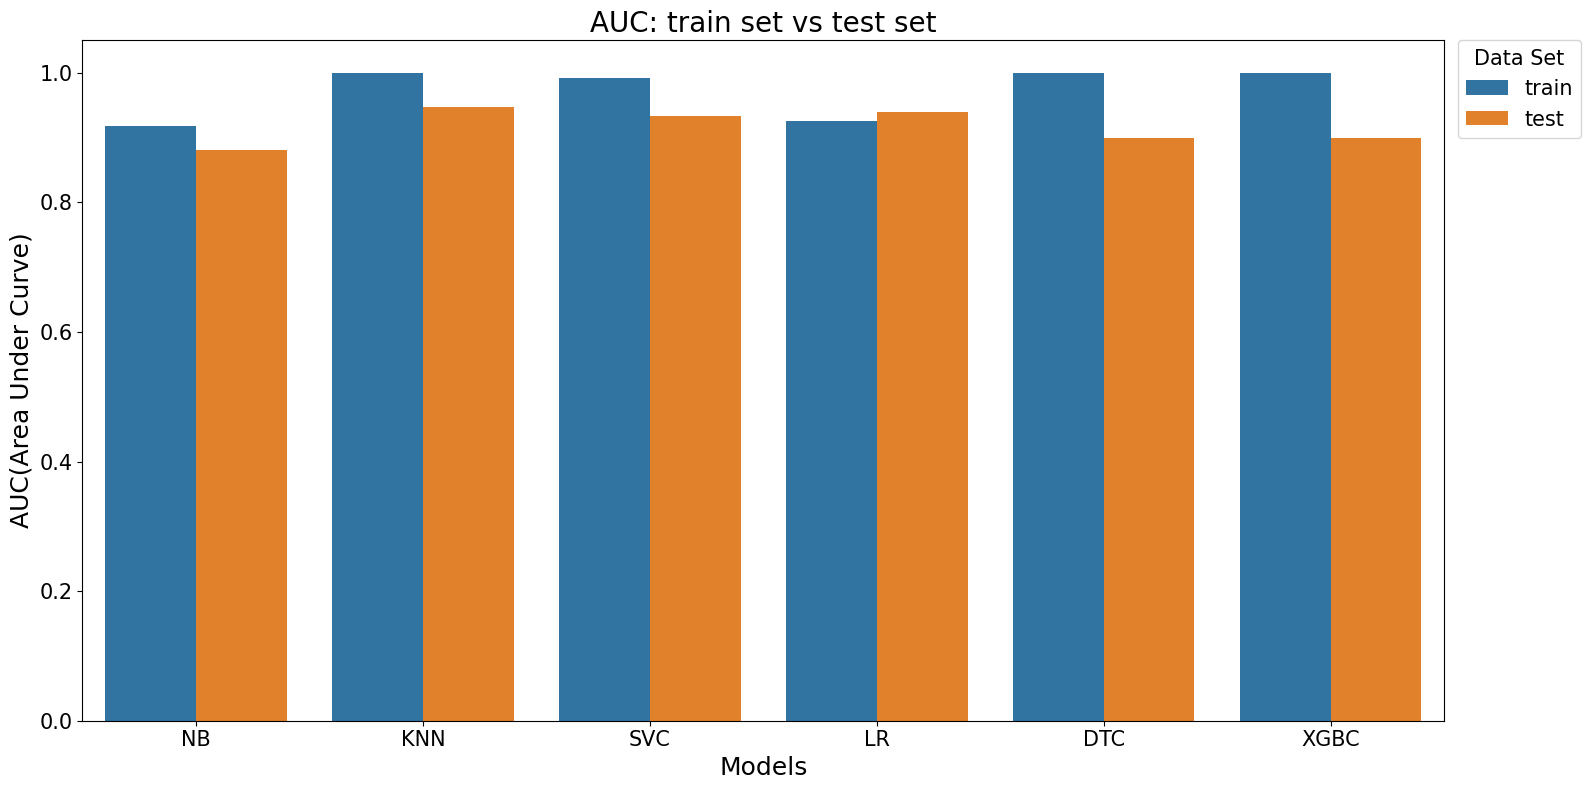

In [4]:
# Comparando a métrica "AUC" dos modelos nos dados de treino e teste:
ptlib.plot_ml_metrics(
    data=models_best_metrics, x='Model', y='AUC', hue='Data set', plot_style=None, title="AUC: train set vs test set",
    title_fontsize=20, xlabel="Models", xlabel_fontsize=18, ylabel="AUC(Area Under Curve)", ylabel_fontsize=18,
    ticks_fontsize=15, legendtitle="Data Set", legendtitle_fontsize=15, legend_label=None, legend_fontsize=15,
    legend_loc=2, legend_borderaxespad=0., legend_bbox_to_anchor=(1.01, 1), width=16, height=8,
    figure_id='plot_auc_train_vs_test', figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:** podemos observar que os modelos que apresentaram um desempenho melhor, nos dados de treino e teste, foram: **`KNN`**, **`SVC`**, e **`LR`**.

Agora, vamos avaliar o desempenho dos modelos na métrica **`AUC`** considerando apenas os **dados de teste**.

### Avaliando a métrica `AUC` nos dados de teste:

Agora, vamos plotar um gráfico comparando as métricas **`AUC`**, de cada modelo, e então vamos definir qual dos modelos atende as necessidades do projeto para resolver o problema de negócio para o qual ele foi criado:

### `AUC`

Saving figure: plot_models_vs_auc


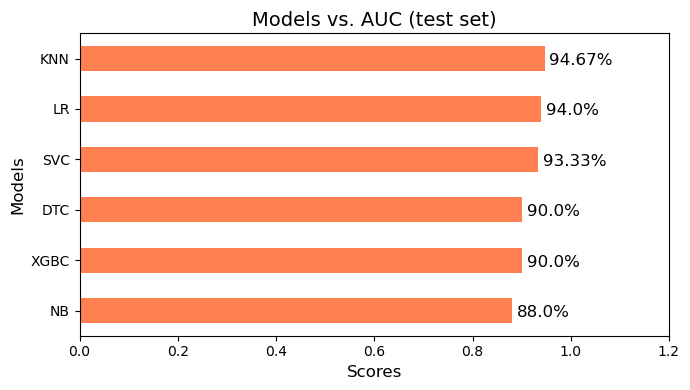

In [5]:
# Criando um objeto (Serie) com os valores da métrica "AUC" classificados em ordem descrescente:
# Criando um índice para selecionarmos apenas as linhas referente aos dados de teste:
index = models_best_metrics['Data set'] == 'test'
# Classificando as taxas de "AUC":
models_auc = models_best_metrics.loc[index, ['Model','AUC']].set_index(keys='Model')['AUC'].sort_values(ascending=False)

# Plot: models vs AUC
ptlib.plot_models_vs_scores(
    scores=models_auc, plot_style=None, bar_color='coral', alpha=0.8,
    score_color='black', score_fontsize=12, title="Models vs. AUC (test set)",
    title_fontsize=14, xlabel="Scores", xlabel_fontsize=12, ylabel='Models',
    ylabel_fontsize=12, ticks_fontsize=10, width=7, height=4,
    figure_id='plot_models_vs_auc', figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:** de acordo com o gráfico acima, cinco modelos tiveram um desempenho satisfatório e podem ser utilizados para solucionar o problema de negócio, ou seja, **prever se o paciente, com hepatite, irá morrer ou sobreviver**. São eles:

1. `KNN`: *AUC = 94.67%*;

2. `LR`: *AUC = 94.00%*;

3. `SVC`: *AUC = 93.33%*;

4. `DTC`: *AUC = 90.00%*;

5. `XGBC`: *AUC = 90.00%*.

Os cinco modelos previtivos conseguiram obter, na métrica **AUC**, o valor mínimo desejado para o projeto que é de **90%**.

Entretanto, vamos escolher o modelo **`KNN`** (***K Neighbors Classifier***) porque ele apresentou a **melhor performance** entre os modelos, ou seja, **`AUC = 94.67%`**.

Portanto, a minha escolha para o projeto é o modelo criado com o algoritmo **`KNN`** (***K Neighbors Classifier***).

## <font color='black'>FIM</font>